In [1]:
fruit_length = [5.4, 6.3, 6.5, 6.6, 7.4, 7.7, 8.0, 8.7, 10.0, 10.7, 11.0, 11.0, 11.5, 12.0, 12.0, 12.0, 13.0, 13.0, 13.5, 13.5,
                14.0,14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0, 18.5, 18.5, 19.5, 11.0, 11.0
                , 1.8, 2.5, 2.6, 2.0, 2.2, 2.3, 2.8, 2.8, 2.0, 2.2, 2.4, 2.0, 2.3, 2.0]
fruit_weight = [22.0, 27.0, 29.0, 30.0, 33.0, 41.0, 50.0, 49.0, 45.0, 50.0, 47.0, 50.0, 50.0, 44.0, 60.0, 60.0, 70.0, 70.0, 61.0, 65.0, 
                57.0,68.0, 62.0, 68.0, 70.0, 72.0, 72.0, 71.0, 85.0, 90.0, 92.0, 95.0, 92.0, 57.0, 55.0
                ,1.7, 2.0, 2.0, 1.7, 2.8, 1.7, 2.1, 2.3, 1.8, 2.2, 1.9, 2.2, 2.3, 1.9]

In [2]:
import numpy as np

In [3]:
fruit_data = np.column_stack((fruit_length,fruit_weight))

column_stack : 주어진 배열을 나란히 세운 후 열로 붙여준다<br>
1 0<br>
1 0<br>
1 0<br>
1 0<br><br>

row_stack : 주어진 배열을 행으로 붙여준다.<br>1 1 1 1<br>0 0 0 0<br><br>
concatenate : 주어진 배열을 길게 붙여준다.<br>1 1 1 1 0 0 0 0


In [4]:
fruit_target = np.concatenate((np.ones(35), np.zeros(14)))
# fruit_target = [1]*35 + [0]*14

In [5]:
# 예시
# 1,0이 아닌 특정 값으로 채워진 배열 - 9로 채워진 2x3 배열 만들기
np.full((2,3),9)

array([[9, 9, 9],
       [9, 9, 9]])

## 사이킷런으로 데이터 나누기
훈련 세트와 테스트 세트 나누기

- sklearn의 model_selection밑에 train_test_split 함수로 제공

- 데이터와 타켓을 한 번에 전달해서 훈련 세트와 테스트 세트로 나눌 수 있음

- 여러 개의 배열을 더 넣을 수 있지만 입력/타켓 데이터로 나누는 경우가 대부분이기때문에 두 개를 넣는 경우가 많다.

- stratify : 분류일 경우 샘플링 편향이 생기지 않도록 타켓 클래스가 골고루 섞여야하기때문에  **타켓 배열**을 전달해주면 그 타겟 배열을 보고 타켓 값이 골고루 섞이도록 훈련 세트와 테스트 세트를 나누어준다.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(fruit_data,fruit_target,stratify=fruit_target,random_state=42)

In [8]:
print(train_input.shape,test_input.shape)

(36, 2) (13, 2)


In [9]:
print(train_target.shape,test_target.shape)

(36,) (13,)


### 수상한 값을 넣어서 테스트하자.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [11]:
# 수상한 사과
print(kn.predict([[5, 17]]))

[0.]


In [12]:
import matplotlib.pyplot as plt

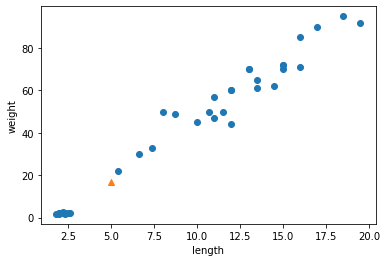

In [13]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(5, 17, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

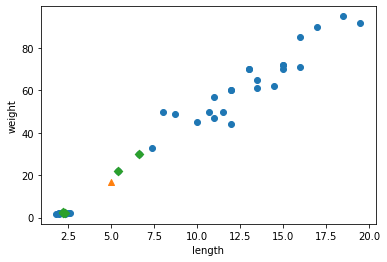

In [14]:
# k-최근접 알고리즘이 바라보는 이웃의 인덱스 샘플
distances, indexes = kn.kneighbors([[5,16]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(5, 17, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
print(train_input[indexes])

[[[ 5.4 22. ]
  [ 2.2  2.8]
  [ 2.3  2.3]
  [ 2.2  2.2]
  [ 6.6 30. ]]]


In [16]:
print(train_target[indexes])

[[1. 0. 0. 0. 1.]]


In [17]:
print(distances)

[[ 6.01331855 13.49370223 13.96352391 14.08119313 14.09113196]]


### 기준을 맞춰라
- x축과 y축의 기준이 다르기때문에 위과 같이 예측하는 것...

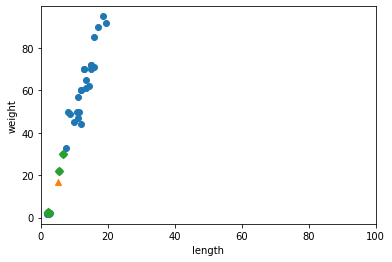

In [18]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(5, 17, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 100))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 표준 점수로 바꾸기
 (특성-평균)/표준편차

In [19]:
mean = np.mean(train_input, axis=0) # 각 특성별로 구하기때문에 (1X2)
std = np.std(train_input, axis=0)

print(mean, std)

[ 9.65833333 44.23888889] [ 5.50118043 30.41133997]


In [20]:
train_scaled = (train_input - mean) / std
train_scaled.shape # 넘파이_브로드캐스팅

(36, 2)

### 전처리 데이터로 모델 훈련하기

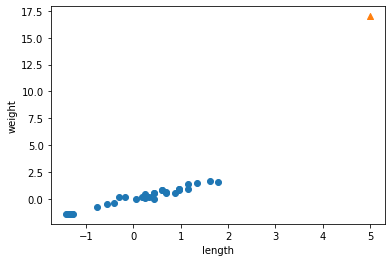

In [21]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(5, 17, marker='^') # 표준점수 스타일로 바꿔야 함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
# 훈련 데이터의 평균과 표준편차로 test set을 바꿔야함
new = ([5, 17] - mean) / std

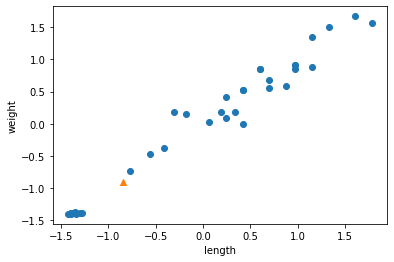

In [23]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
test_scaled = (test_input - mean) / std

In [26]:
kn.score(test_scaled, test_target)

1.0

In [27]:
print(kn.predict([new]))

[1.]


전처리는 아주 중요하고 지루한 작업<br>
전처리가 필요하지 않은 모델은 tree 기반 모델들